# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohammad 'Alwan Fauzi
- **Email:** mc006d5y1380@student.devacademy.id
- **ID Dicoding:** MC006D5Y1380

## Menentukan Pertanyaan Bisnis

- Bagaimana grafik penggunaan sepeda untuk tiap bulan dan grafik pada hari kerja dibandingkan dengan akhir pekan sepanjang tahun 2011 dan 2012?
- Bagaimana pengaruh kondisi cuaca (cuaca, suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda selama dua tahun (2011-2012)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("dataset\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan dataframe

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Memuat informasi dataset

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Menghitung jumlah missing value

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- mencari jumlah duplikasi

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- melakukan perintah describe untuk mencari informasi lebih lanjut

In [9]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Insight:**
- melihat variasi value

#### Menilai hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Memuat informasi dataset

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Menghitung jumlah missing value

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- mencari jumlah duplikasi

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- melakukan perintah describe untuk mencari informasi lebih lanjut

In [14]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

**Insight:**
- melihat variasi value

### Cleaning Data

In [15]:
# Konversi kolom 'dteday' ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- xxx
- xxx

In [38]:
# Konversi nilai kolom `yr` menjadi tahun yang lebih mudah dibaca
day_df["yr"] = day_df["yr"].map({0: 2011, 1: 2012})

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Pada Project ini dataset yang digunakan hanya dataset day.cvs

### Explore ...

## Pertanyaan Nomor 1

In [40]:
# 📊 Agregasi Penyewaan Sepeda per Bulan untuk 2011 dan 2012
monthly_agg = day_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()
monthly_agg.columns = ["Tahun", "Bulan", "Total Penyewaan"]

# 🚴‍♂️ Agregasi Penyewaan Hari Kerja vs Akhir Pekan per Tahun
workday_agg = day_df.groupby(["yr", "workingday"])["cnt"].sum().reset_index()
workday_agg.columns = ["Tahun", "Hari Kerja (1=Ya, 0=Tidak)", "Total Penyewaan"]

# Tampilkan hasil agregasi
print("📊 Agregasi Penyewaan Sepeda per Bulan:")
print(monthly_agg.head())

print("\n🚴‍♂️ Agregasi Penyewaan Hari Kerja vs Akhir Pekan per Tahun:")
print(workday_agg.head())

📊 Agregasi Penyewaan Sepeda per Bulan:
   Tahun  Bulan  Total Penyewaan
0   2011      1            38189
1   2011      2            48215
2   2011      3            64045
3   2011      4            94870
4   2011      5           135821

🚴‍♂️ Agregasi Penyewaan Hari Kerja vs Akhir Pekan per Tahun:
   Tahun  Hari Kerja (1=Ya, 0=Tidak)  Total Penyewaan
0   2011                           0           386839
1   2011                           1           856264
2   2012                           0           613430
3   2012                           1          1436146


**Insight:**
- xxx
- xxx

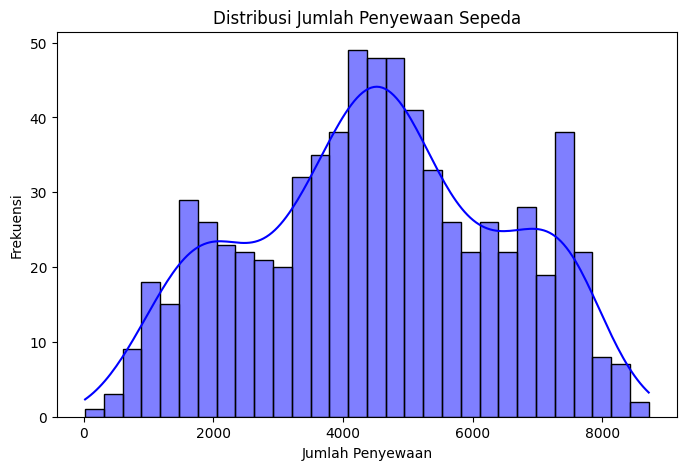

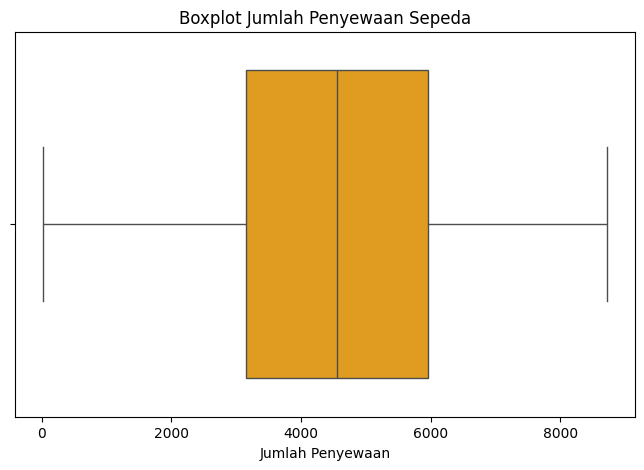

In [43]:
# 📊 **Histogram Distribusi Penyewaan Sepeda**
plt.figure(figsize=(8,5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

# 📦 **Boxplot Penyewaan Sepeda untuk Mendeteksi Outlier**
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df["cnt"], color="orange")
plt.title("Boxplot Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- xxx
- xxx

## Pertanyaan Nomor 2

In [45]:
day_df[['temp', 'hum', 'windspeed', 'cnt']].describe()

,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486,4504.348837
std,0.183051,0.142429,0.077498,1937.211452
min,0.059130,0.000000,0.022392,22.000000
25%,0.337083,0.520000,0.134950,3152.000000
50%,0.498333,0.626667,0.180975,4548.000000
75%,0.655417,0.730209,0.233214,5956.000000
max,0.861667,0.972500,0.507463,8714.000000


**Insight:**
- xxx
- xxx

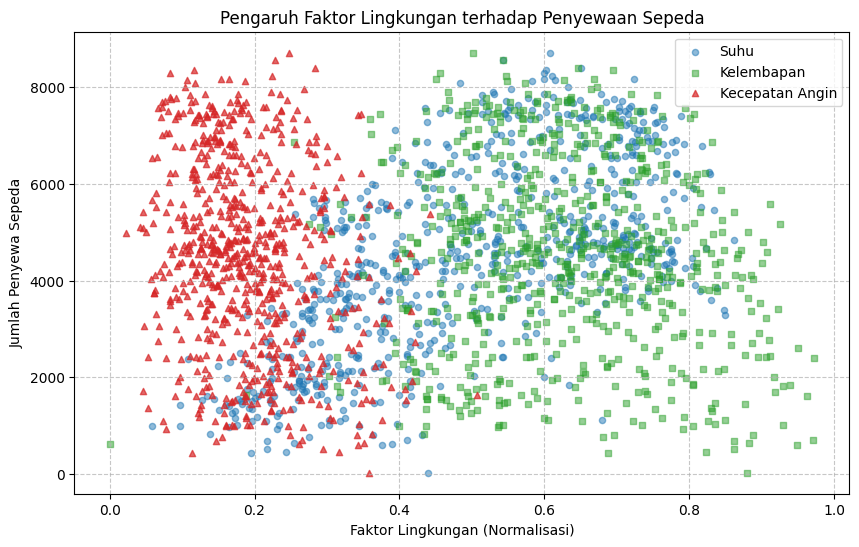

In [54]:
# Buat Figure
plt.figure(figsize=(10, 6))

# Scatter plot untuk masing-masing faktor lingkungan
plt.scatter(day_df['temp'], day_df['cnt'], label="Suhu", color='#1f77b4', alpha=0.5, s=20, marker="o")  # Biru
plt.scatter(day_df['hum'], day_df['cnt'], label="Kelembapan", color='#2ca02c', alpha=0.5, s=20, marker="s")  # Hijau
plt.scatter(day_df['windspeed'], day_df['cnt'], label="Kecepatan Angin", color='#d62728', alpha=0.7, s=20, marker="^")  # Merah

# Tambahkan Label dan Grid
plt.xlabel("Faktor Lingkungan (Normalisasi)")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Pengaruh Faktor Lingkungan terhadap Penyewaan Sepeda")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Tampilkan Plot
plt.show()

**Insight:**
- xxx
- xxx

C:\Users\Alwan Fauzi\AppData\Local\Temp\ipykernel_8744\3522518188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'], palette=['lightblue', 'gray', 'salmon'])


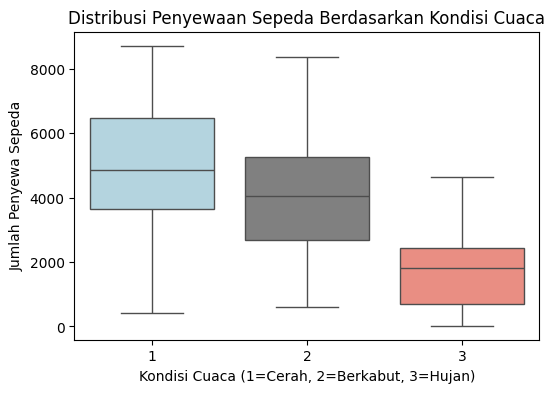

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'], palette=['lightblue', 'gray', 'salmon'])
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Berkabut, 3=Hujan)")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

d:\anaconda\envs\main-ds\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


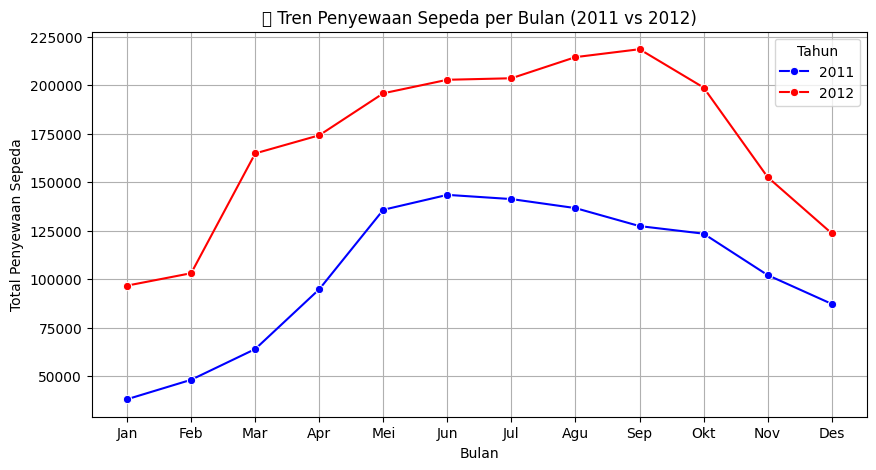

d:\anaconda\envs\main-ds\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128692 (\N{BICYCLIST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


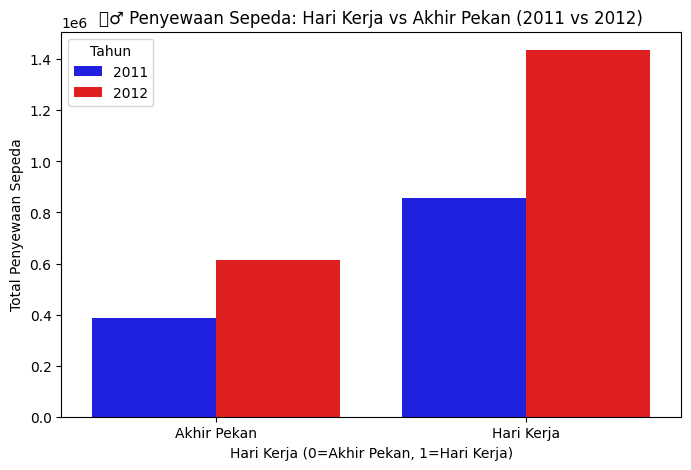

In [42]:
# 📅 **Grafik Penyewaan Sepeda per Bulan untuk 2011 dan 2012**
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_agg, x="Bulan", y="Total Penyewaan", hue="Tahun", marker="o", palette=["blue", "red"])
plt.title("📊 Tren Penyewaan Sepeda per Bulan (2011 vs 2012)")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

# 🚴‍♂️ **Grafik Penyewaan Sepeda: Hari Kerja vs Akhir Pekan per Tahun**
plt.figure(figsize=(8,5))
sns.barplot(data=workday_agg, x="Hari Kerja (1=Ya, 0=Tidak)", y="Total Penyewaan", hue="Tahun", palette=["blue", "red"])
plt.title("🚴‍♂️ Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (2011 vs 2012)")
plt.xlabel("Hari Kerja (0=Akhir Pekan, 1=Hari Kerja)")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(ticks=[0,1], labels=["Akhir Pekan", "Hari Kerja"])
plt.legend(title="Tahun")
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 2:

C:\Users\Alwan Fauzi\AppData\Local\Temp\ipykernel_8744\1226315987.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kondisi Cuaca", y="cnt", data=weather_avg, palette=["lightblue", "gray", "salmon"])


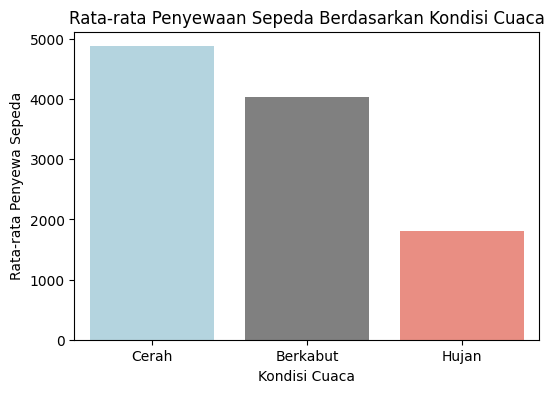

In [48]:
weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_avg["Kondisi Cuaca"] = weather_avg["weathersit"].map({1: "Cerah", 2: "Berkabut", 3: "Hujan"})

plt.figure(figsize=(6,4))
sns.barplot(x="Kondisi Cuaca", y="cnt", data=weather_avg, palette=["lightblue", "gray", "salmon"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewa Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()


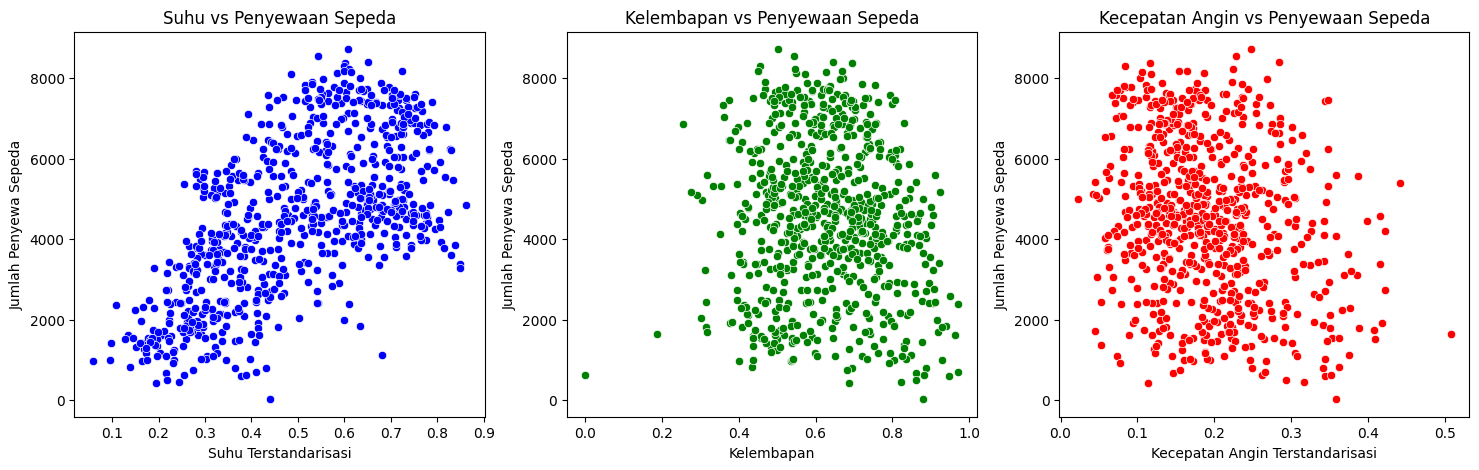

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot: Suhu vs Penyewaan Sepeda
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], ax=axes[0], color='blue')
axes[0].set_title("Suhu vs Penyewaan Sepeda")
axes[0].set_xlabel("Suhu Terstandarisasi")
axes[0].set_ylabel("Jumlah Penyewa Sepeda")

# Scatter Plot: Kelembapan vs Penyewaan Sepeda
sns.scatterplot(x=day_df['hum'], y=day_df['cnt'], ax=axes[1], color='green')
axes[1].set_title("Kelembapan vs Penyewaan Sepeda")
axes[1].set_xlabel("Kelembapan")
axes[1].set_ylabel("Jumlah Penyewa Sepeda")

# Scatter Plot: Kecepatan Angin vs Penyewaan Sepeda
sns.scatterplot(x=day_df['windspeed'], y=day_df['cnt'], ax=axes[2], color='red')
axes[2].set_title("Kecepatan Angin vs Penyewaan Sepeda")
axes[2].set_xlabel("Kecepatan Angin Terstandarisasi")
axes[2].set_ylabel("Jumlah Penyewa Sepeda")

plt.show()

**Insight:**
- xxx
- xxx

In [56]:
day_df.to_csv("dashboard/datafix.csv", index=False)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2